In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os 
os.chdir("/content/drive/My Drive/Image Segmentation/")

In [3]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
#sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
from src.model import potato

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
POTATO_MODEL_PATH = os.path.join(MODEL_DIR, "mask_rcnn_potato_0011.h5")

class InferenceConfig(potato.potatoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(POTATO_MODEL_PATH, by_name=True)

# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'potato']


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.


In [0]:
import cv2

def make_segmentation_mask(image, mask):
    img = image.copy()
    img[:,:,0] *= mask
    img[:,:,1] *= mask
    img[:,:,2] *= mask
    return img

def getPredictionImages(IMAGE_DIR, image_name, OUTPUT_DIR):
    image = skimage.io.imread(os.path.join(IMAGE_DIR, image_name))

    results = model.detect([image], verbose=1)

    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
    boxes = r['rois']
    masks = r['masks']

    segmented_images = []
    for i in range(len(boxes)):
        mask = masks[:,:,i]
        img = make_segmentation_mask(image, mask)
        (startX, startY, endX, endY) = boxes[i]
        part1 = img[startX:endX,startY:endY]
        segmented_images.append(part1)

    print("No:",len(segmented_images))
    w=200
    h=200
    fig=plt.figure(figsize=(20, 20))
    columns = 4
    rows = int(len(segmented_images)/4)+1
    for i in range(0, len(segmented_images)):
        img = segmented_images[i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
    plt.show()
    #for i in range(0, len(segmented_images)):
        #cv2.imwrite(OUTPUT_DIR+"potato_23_532{}.png".format(i), segmented_images[i])


Processing 1 images
image                    shape: (600, 600, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


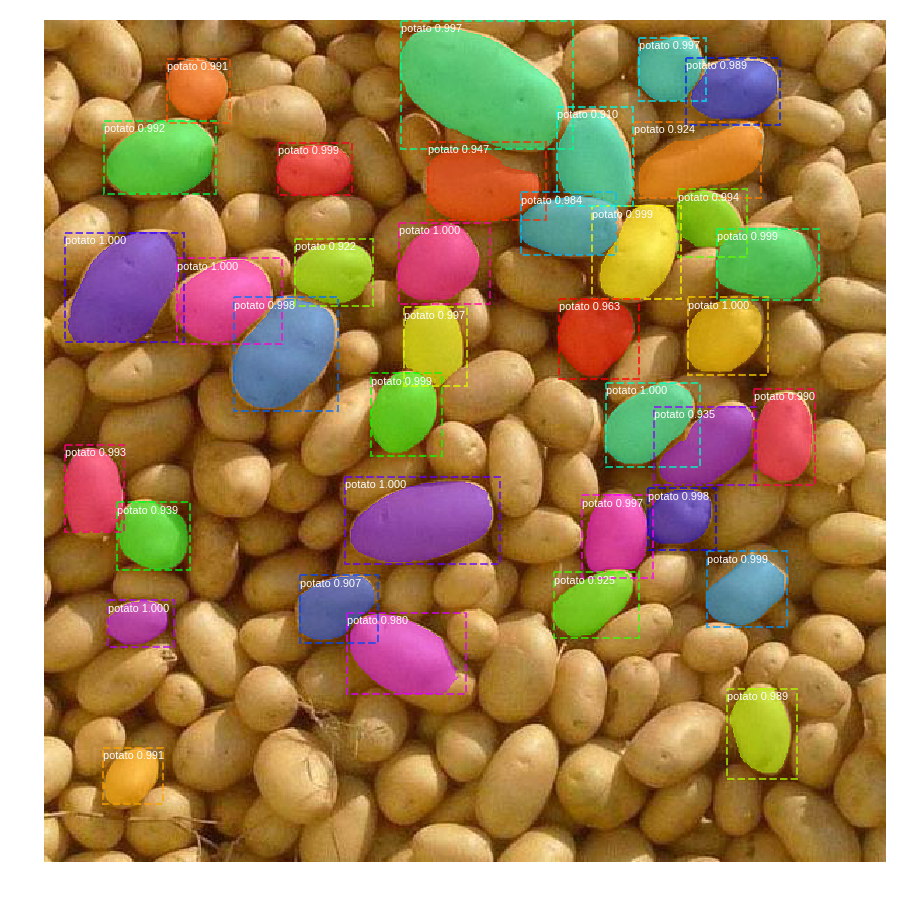

No: 37


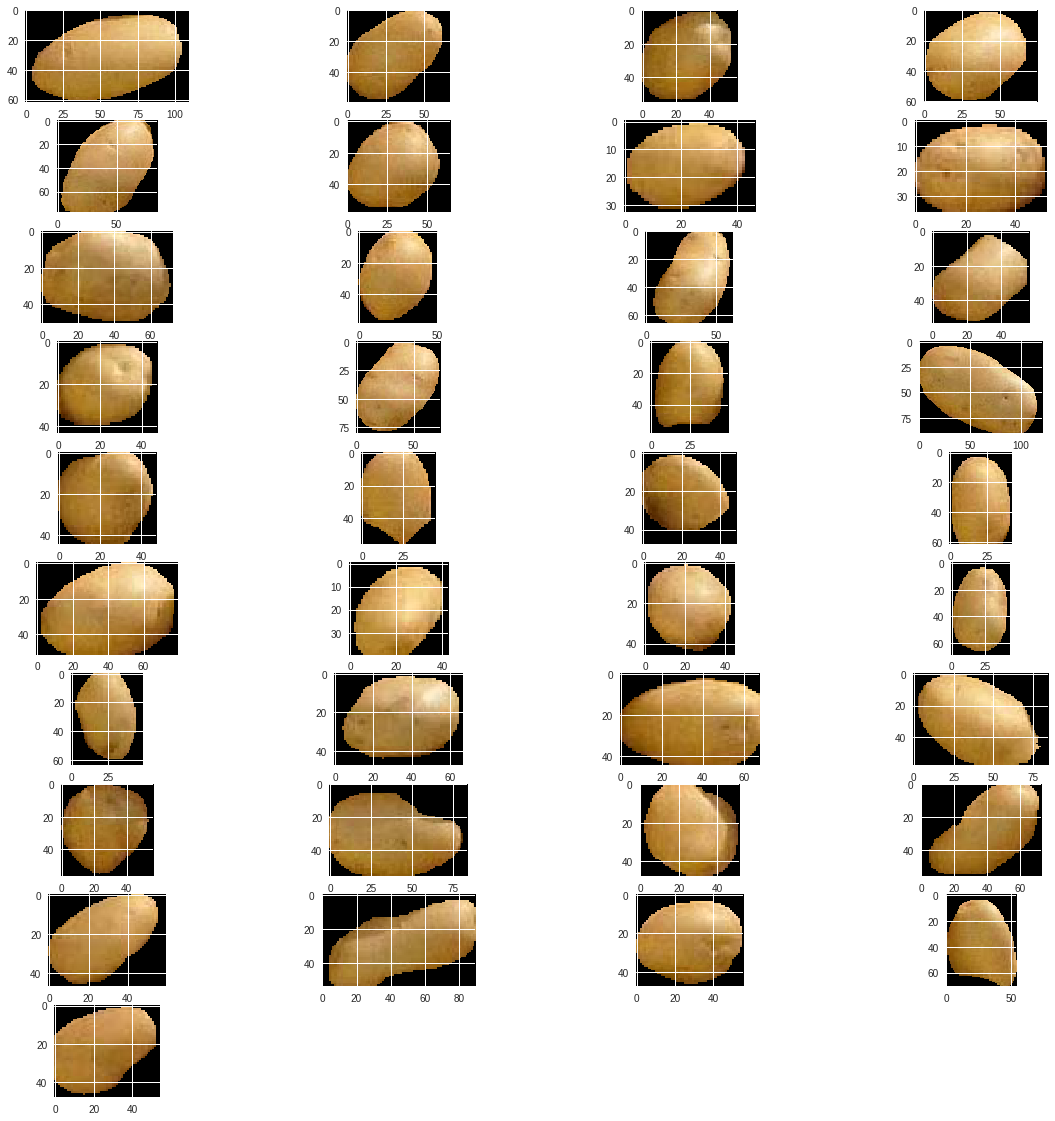

In [7]:
IMAGE_DIR = "/content/drive/My Drive/Image Segmentation/datasets/test"
OUTPUT_DIR = ""
getPredictionImages(IMAGE_DIR,"4.jpg",OUTPUT_DIR)

Processing 1 images
image                    shape: (271, 435, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


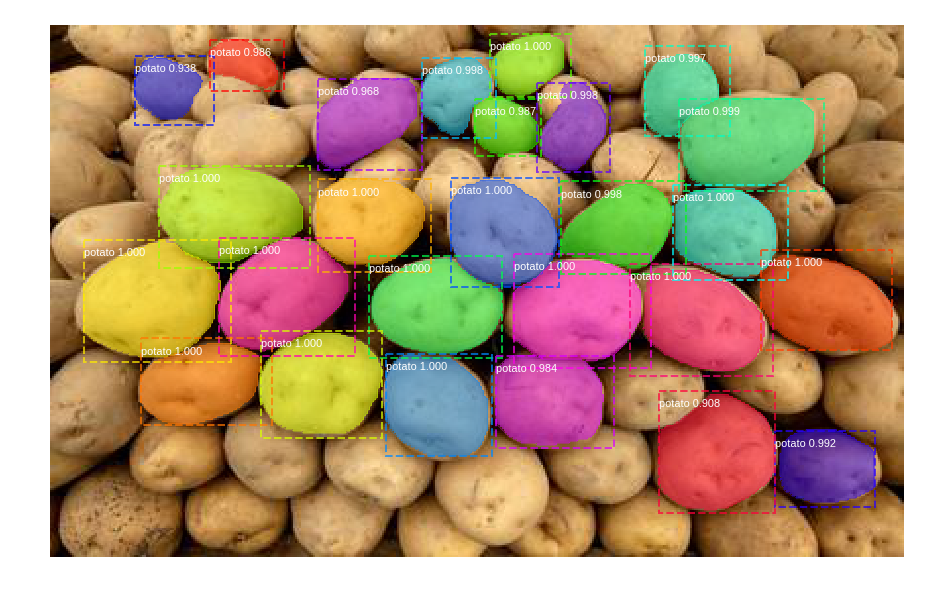

No: 26


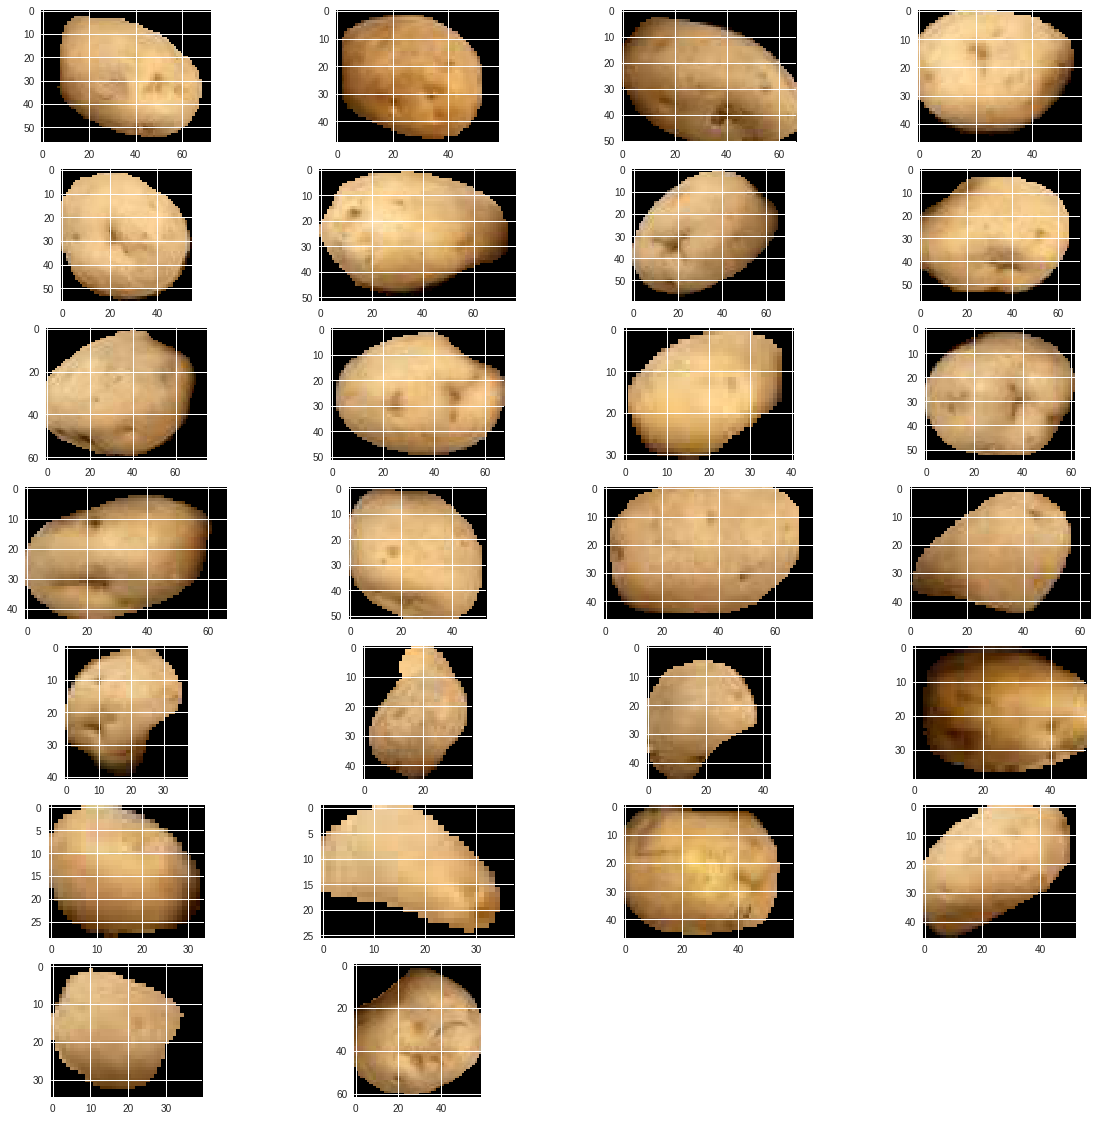

In [6]:
IMAGE_DIR = "/content/drive/My Drive/Image Segmentation/datasets/test"
OUTPUT_DIR = ""
getPredictionImages(IMAGE_DIR,"2.jpg",OUTPUT_DIR)

Processing 1 images
image                    shape: (1836, 3264, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 3264.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


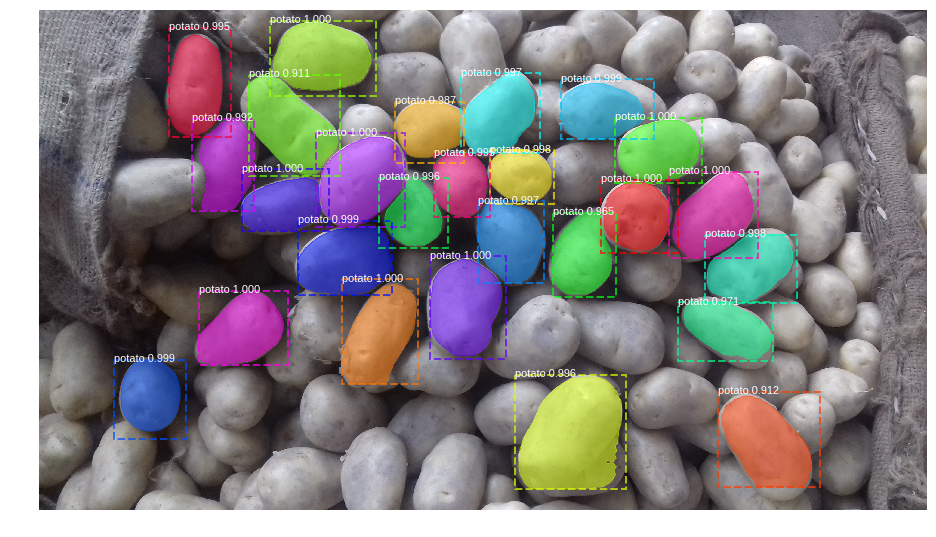

No: 26


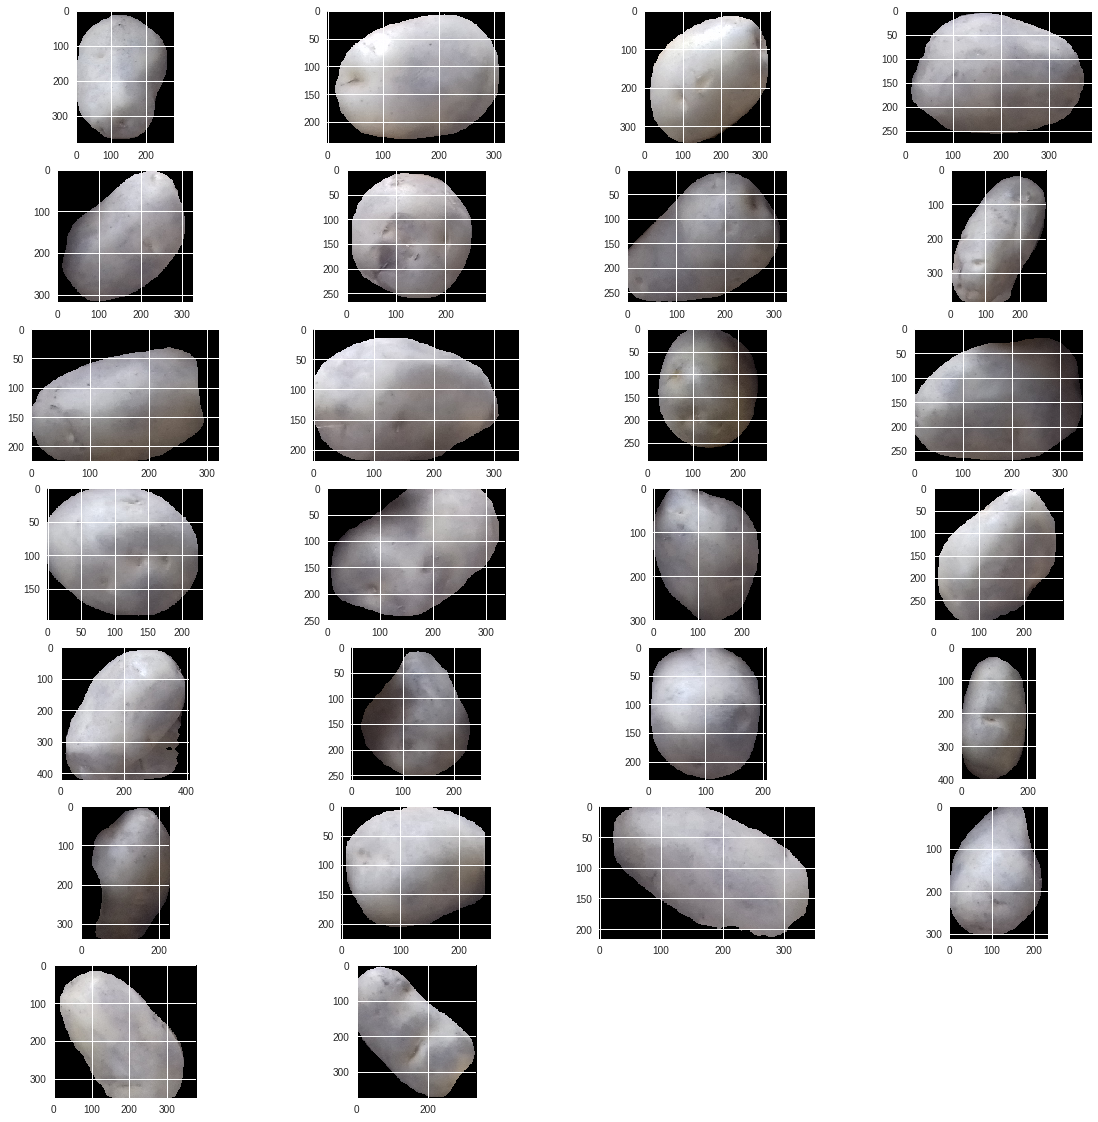

In [0]:
IMAGE_DIR = "/content/drive/My Drive/Image Segmentation/datasets/val"
OUTPUT_DIR = ""
getPredictionImages(IMAGE_DIR,"potato2.jpg",OUTPUT_DIR)